# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 17: Ice-albedo feedback in the EBM

____________
<a id='section1'></a>

## 1. Review of the 1D EBM
____________

Last time we derived the equation for the one-dimensional EBM with diffusive heat transport:

$$ C \frac{\partial T}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right) $$


We have chosen the following parameter values, which seems to give a reasonable fit to the observed **annual mean temperature and energy budget**:

- $ A = 210 ~ \text{W m}^{-2}$ (emission at 0$^\circ$C)
- $ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $ (increase in emission per degree, related to net longwave climate feedback)
- $ D = 0.6 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $ (thermal diffusivity of the climate system)

We looked at the adjustment of this model to equilibrium, with annual mean insolation $\overline{Q(\phi)}$ and specified albedo $\alpha(\phi)$ (giving a reasonable fit to observations).

We also tuned the diffuvisity $D$ so that our annual mean solution has a reasonable pole-to-equator temperature gradient and peak poleward heat transport.

____________
<a id='section2'></a>

## 2. Interactive snow/ice line in the EBM
____________

What we want to do today is introduce another process into our model: an **interactive snow and ice line**. 

The idea is simply that, as the climate gets warmer, the snow and ice will retreat poleward, and the planetary albedo will decrease (or vice-versa).

We modeled this in the zero-dimensional model by using a kind of ramp function for the global mean albedo as a function of global mean temperature.

Here, since our model resolves temperature at each latitude, we want to do something more physical: *suppose that the surface is covered in ice and snow wherever the temperature is below some threshold $T_f$.*

### Temperature-dependent ice line

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f  & \text{(ice-covered)} \\
a_i & ~ & T(\phi) \le T_f & \text{(no ice)} \\
\end{array} \right. $$

where $P_2(\sin\phi) = \frac{1}{2}\left( 3\left(\sin\phi\right)^2 - 1 \right) $ is called the *second Legendre Polynomial* (just a mathematically convenient description of a smooth variation between the equator and pole).

Empirically, we follow classic work by Budyko and set the threshold temperature

$$ T_f = -10^\circ\text{C} $$

This is known as a "step function" formula, because the value of $\alpha$ steps or jumps up to a higher value as we cross the ice line.

____________
<a id='section3'></a>

## 3. Solving the EBM with variable snow/ice line in CLIMLAB
____________

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab

In [2]:
#  for convenience, set up a dictionary with our reference parameters
param = {'D':0.55, 'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual( num_lat=180, D=0.55, A=210., B=2., Tf=-10., a0=0.3, a2=0.078, ai=0.62)
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>



Because we provided a parameter `ai` for the icy albedo, our model now contains several sub-processes contained within the process called `albedo`. Together these implement the step-function formula above.

The process called `iceline` simply looks for grid cells with temperature below $T_f$.

In [3]:
print(model1.param)

{'timestep': 350632.51200000005, 'S0': 1365.2, 'A': 210.0, 'B': 2.0, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}


In [4]:
#  A python shortcut... we can use the dictionary to pass lots of input arguments simultaneously:

#  same thing as before, but written differently:
model1 = climlab.EBM_annual( num_lat=180, **param)
print(model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>



In [5]:
def ebm_plot(e, return_fig=False):    
    templimits = -60,32
    radlimits = -340, 340
    htlimits = -6,6
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    fig = plt.figure(figsize=(8,12))

    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(e.lat, e.Ts)
    ax1.set_ylim(templimits)
    ax1.set_ylabel('Temperature (deg C)')
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(e.lat, e.ASR, 'k--', label='SW' )
    ax2.plot(e.lat, -e.OLR, 'r--', label='LW' )
    ax2.plot(e.lat, e.net_radiation, 'c-', label='net rad' )
    ax2.plot(e.lat, e.heat_transport_convergence(), 'g--', label='dyn' )
    ax2.plot(e.lat, e.net_radiation.squeeze() + e.heat_transport_convergence(), 'b-', label='total' )
    ax2.set_ylim(radlimits)
    ax2.set_ylabel('Energy budget (W m$^{-2}$)')
    ax2.legend()
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(e.lat_bounds, e.heat_transport() )
    ax3.set_ylim(htlimits)
    ax3.set_ylabel('Heat transport (PW)')
    
    for ax in [ax1, ax2, ax3]:
        ax.set_xlabel('Latitude')
        ax.set_xlim(latlimits)
        ax.set_xticks(lat_ticks)
        ax.grid()
    
    if return_fig:
        return fig

In [6]:
model1.integrate_years(5)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.000000000000044 years.


In [7]:
climlab.global_mean(model1.ASR - model1.OLR)

array(0.025896043544918194)

In [8]:
climlab.global_mean(model1.net_radiation)

array(0.025896043544918194)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 9.999999999999863 years.
1.2815864885734942e-05


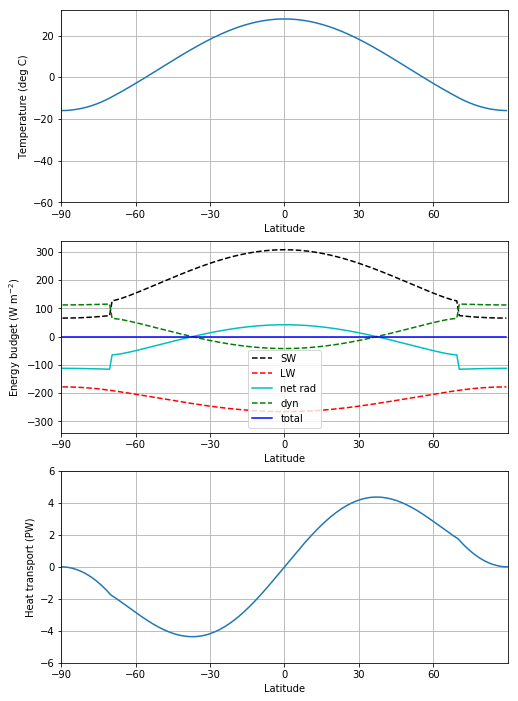

In [9]:
# Integrate out to equilibrium.
model1.integrate_years(5)
#  Check for energy balance
print(climlab.global_mean(model1.net_radiation))
f = ebm_plot(model1)

In [10]:
#  There is a diagnostic that tells us the current location of the ice edge:
model1.icelat

array([-70.,  70.])

## Polar-amplified warming in the EBM

### Add a small radiative forcing

The equivalent of doubling CO2 in this model is something like 

$$ A \rightarrow A - \delta A $$

where $\delta A = 4$ W m$^{-2}$.



In [11]:
model1.subprocess['LW'].A

210

In [12]:
param['A']

210

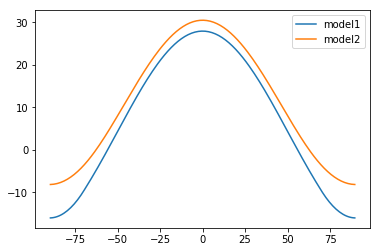

In [13]:
deltaA = 4.

#  This is a very handy way to "clone" an existing model:
model2 = climlab.process_like(model1)

#  Now change the longwave parameter:
model2.subprocess['LW'].A = param['A'] - deltaA
#  and integrate out to equilibrium again
model2.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts, label='model1')
plt.plot(model2.lat, model2.Ts, label='model2')
plt.legend()

**The warming is polar-amplified**:  more warming at the poles than elsewhere.

Why?

Also, the current ice line is now:

In [14]:
model2.icelat

array([-90.,  90.])

There is no ice left!

Let's do some more greenhouse warming:

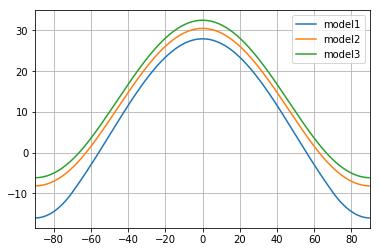

In [15]:
model3 = climlab.process_like(model1)
model3.subprocess['LW'].A = param['A'] - 2*deltaA
model3.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts, label='model1')
plt.plot(model2.lat, model2.Ts, label='model2')
plt.plot(model3.lat, model3.Ts, label='model3')
plt.xlim(-90, 90)
plt.grid()
plt.legend()

In the ice-free regime, there is no polar-amplified warming. A uniform radiative forcing produces a uniform warming.

## A different kind of climate forcing: changing the solar constant

Historically EBMs have been used to study the climatic response to a change in the energy output from the Sun.

We can do that easily with `climlab`:

In [16]:
m = climlab.EBM_annual( num_lat=180, **param )
#  The current (default) solar constant, corresponding to present-day conditions:
m.subprocess.insolation.S0

1365.2

##  What happens if we decrease $S_0$?

In [17]:
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 5.000000000000044 years.


array(0.025896043544918194)

In [18]:
m.icelat

array([-70.,  70.])

In [19]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1300.

In [20]:
#  Integrate to new equilibrium
m.integrate_years(10.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 14.999999999999647 years.


array(-0.00013379413259364517)

In [21]:
m.icelat

array([-54.,  54.])

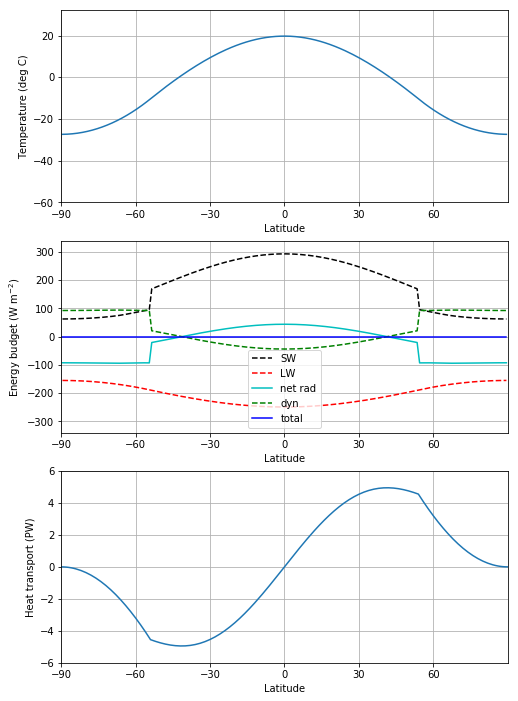

In [22]:
ebm_plot(m)

A much colder climate!  The ice line is sitting at 54º. The heat transport shows that the atmosphere is moving lots of energy across the ice line, trying hard to compensate for the strong radiative cooling everywhere poleward of the ice line.

##  What happens if we decrease $S_0$ even more?


In [23]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1200.
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 19.99999999999943 years.


array(-5.137889634154428)

In [24]:
m.integrate_years(10.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 900 steps, 3652.4220000000005 days, or 10.0 years.
Total elapsed time is 30.000000000000693 years.


array(-1.2583877115619198e-06)

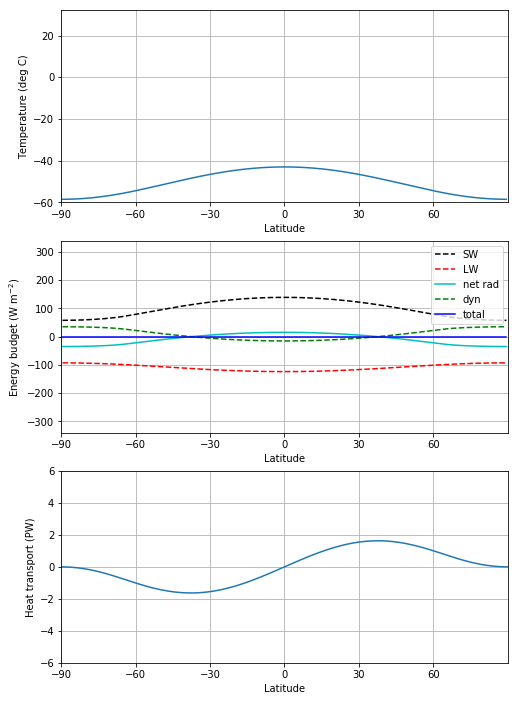

In [25]:
ebm_plot(m)

Something very different happened! Where is the ice line now?

In [26]:
m.icelat

array([-0.,  0.])

## Now what happens if we set $S_0$ back to its present-day value?

In [27]:
#  Now make the solar constant smaller:
m.subprocess.insolation.S0 = 1365.2
#  First, get to equilibrium
m.integrate_years(5.)
#  Check for energy balance
climlab.global_mean(m.net_radiation)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.
Total elapsed time is 35.0000000000016 years.


array(0.007900514406566287)

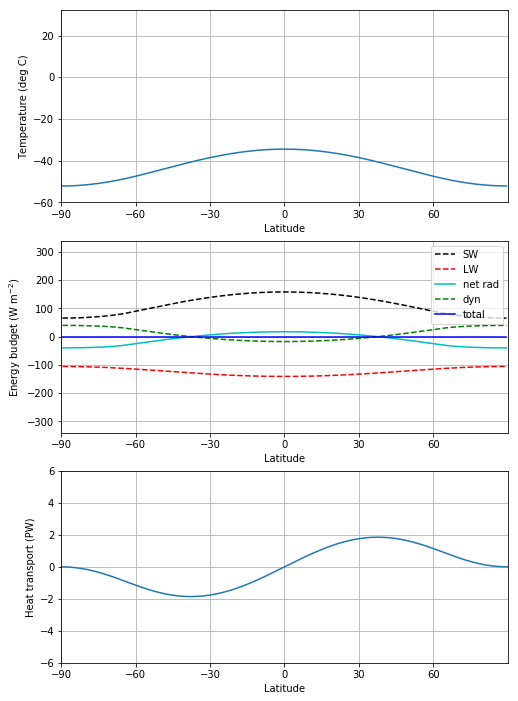

In [28]:
ebm_plot(m)

Is this the same climate we started with?

## Getting out of the "Snowball"

To melt all the ice and get out of this so-called "Snowball Earth", we need to raise the solar constant much higher.

You will look at this in your homework assignment.